# Grideye Cubicle Data
*Kernel > Restart & Run All*

In [1]:
# Imports
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Loading the JSON data from the file
with open("betterTransitionlessData.json", "r") as jsonFile:
    jsonList = json.load(jsonFile)

### Creating the dataframes
There are 3 different dataframes that have been made for accessing the data easily, in whichever format works best for you.

 - **cubicleData_allInfo** has all of the information, including the states, and has the temperature arrays structured in a way that represents how they are physically recorded.
 
 - **cubicleData_essentialInfo_structured** has the temperature arrays structured like how they're physically recorded, and has the states of each row (i.e. either sitting, standing, or empty), but no other information.
 
 - **cubicleData_essentialInfo_flat** has each of the temperature values from the array flattened in order in seperate columns of the dataframe, as well as what the state of that entry is.

In [3]:
tempArrays = [entry["temps"] for entry in jsonList]
states = [entry["state"] for entry in jsonList]
names = [entry["name"] for entry in jsonList]
times = [entry["time"] for entry in jsonList]
    
cubicleData_allInfo = pd.DataFrame(data={"State": states, "TemperatureArray": tempArrays, "ID": names, "Time": times})
#print(cubicleData)
cubicleData_essentialInfo_structured = pd.DataFrame(data={"State": states, "TemperatureArray": tempArrays})

flatLists = []
for index in range(len(tempArrays)):
    arrayList = [states[index]]
    for subList in tempArrays[index]:
        arrayList.extend(subList)
    flatLists.append(arrayList)

cubicleData_essentialInfo_flat = pd.DataFrame(flatLists)

Here are some examples of how the dataframes are structured:

In [4]:
print("cubicleData_allInfo")
cubicleData_allInfo.sample(10)

cubicleData_allInfo


,State,TemperatureArray,ID,Time
4153,standing,"[[22.25, 22.75, 21.75, 21.75, 22.0, 23.0, 22.7...",human_2,1.545107e+09
5121,empty,"[[23.5, 23.25, 22.5, 22.5, 22.75, 23.5, 22.75,...",human_1,1.545113e+09
4285,sitting,"[[23.25, 22.75, 22.75, 23.5, 22.75, 23.75, 23....",human_6,1.545095e+09
2820,empty,"[[24.0, 23.75, 23.0, 22.75, 23.5, 24.0, 23.5, ...",human_5,1.545095e+09
1010,sitting,"[[23.75, 23.5, 22.25, 22.75, 22.75, 23.25, 23....",human_7,1.545113e+09
5242,empty,"[[23.25, 23.75, 22.0, 22.5, 22.25, 22.75, 22.7...",human_4,1.545106e+09
3176,standing,"[[24.25, 23.25, 21.75, 22.5, 22.25, 23.0, 23.0...",human_0,1.545094e+09
4184,empty,"[[24.25, 24.0, 23.5, 23.75, 23.25, 23.25, 24.2...",human_4,1.545106e+09
452,empty,"[[22.75, 23.25, 22.5, 22.5, 23.25, 23.5, 23.25...",human_5,1.545095e+09
5345,sitting,"[[23.5, 23.25, 22.25, 22.5, 21.75, 23.0, 23.0,...",human_0,1.545094e+09


In [5]:
print("cubicleData_essentialInfo_structured")
cubicleData_essentialInfo_structured.sample(10)

cubicleData_essentialInfo_structured


,State,TemperatureArray
3712,standing,"[[23.75, 24.0, 22.25, 22.0, 23.0, 23.25, 23.0,..."
3587,sitting,"[[23.0, 24.0, 22.25, 22.75, 22.5, 22.75, 23.25..."
4269,standing,"[[24.5, 23.5, 22.75, 22.25, 22.5, 23.5, 23.75,..."
1049,sitting,"[[23.5, 24.0, 22.0, 22.5, 22.75, 22.75, 23.25,..."
1708,sitting,"[[23.5, 23.75, 22.0, 22.75, 23.0, 23.25, 23.0,..."
1691,sitting,"[[23.75, 23.5, 22.75, 22.75, 22.75, 23.0, 23.5..."
853,sitting,"[[22.75, 23.25, 22.75, 22.5, 22.5, 23.25, 23.0..."
2634,standing,"[[23.5, 23.75, 22.5, 22.25, 23.0, 23.0, 23.0, ..."
4467,standing,"[[23.0, 22.75, 22.25, 22.0, 22.5, 22.5, 22.5, ..."
1249,sitting,"[[23.5, 23.5, 22.0, 22.75, 22.75, 22.75, 23.5,..."


In [6]:
print("cubicleData_essentialInfo_flat")
cubicleData_essentialInfo_flat.sample(10)

cubicleData_essentialInfo_flat


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
380,empty,23.25,23.00,21.75,22.25,21.75,22.50,23.00,22.50,23.00,...,23.00,23.00,23.00,22.75,23.75,23.50,23.75,23.00,24.00,24.00
3100,sitting,24.00,23.25,22.75,22.50,23.25,23.75,23.00,23.25,24.25,...,23.75,23.50,24.25,23.00,24.00,24.25,24.25,23.50,24.75,23.00
774,standing,24.00,24.00,22.50,22.50,22.75,23.50,23.50,22.50,23.75,...,25.00,23.75,23.25,24.50,24.25,26.25,25.50,24.50,24.25,24.50
2980,empty,23.50,23.50,22.25,22.00,22.75,23.00,22.50,22.50,24.00,...,24.25,23.75,23.75,23.50,24.25,24.00,24.25,23.25,23.75,23.25
259,sitting,23.75,23.25,22.00,22.25,22.75,23.75,23.50,23.00,23.50,...,24.00,24.25,24.00,24.00,24.50,24.75,24.75,23.25,24.50,23.50
855,empty,24.25,24.00,22.75,22.25,22.50,23.25,23.50,23.00,23.25,...,24.00,24.00,24.50,23.25,24.00,24.00,25.00,23.75,24.25,24.00
5151,standing,23.50,23.25,22.75,22.50,21.75,23.00,22.50,21.50,23.75,...,24.25,23.75,23.50,24.75,26.50,27.00,26.50,24.25,24.00,24.00
2743,sitting,22.75,23.25,22.25,22.50,22.75,23.25,24.00,23.00,24.25,...,24.25,23.50,23.75,24.00,24.50,24.50,25.00,24.25,24.75,24.00
1268,empty,22.50,22.25,21.75,21.50,22.75,22.50,22.25,21.75,22.75,...,23.50,23.25,22.75,23.50,24.00,23.50,23.25,23.00,24.00,23.00
5327,standing,23.00,23.75,23.00,22.75,23.50,23.75,23.00,23.00,24.00,...,24.75,24.25,24.50,23.75,25.00,27.75,28.00,25.25,24.00,24.25


### Quickly exploring some of the data

Now that we've imported all of the data nicely, lets do a quick dive into somw of the characteristics of the data.

First off, we'll look at what the averages of each state look like.

In [7]:
def pixelStats(state=None, process="mean"):
    """
    Given a described state (e.g. "standing"), get the average of each of the pixel arrays
    of that state and visualise the result.
    """
    if state != None:
        if process == "mean":
            meanSeries = cubicleData_essentialInfo_flat[cubicleData_essentialInfo_flat[0]==state].mean(0)
        elif process == "std":
            meanSeries = cubicleData_essentialInfo_flat[cubicleData_essentialInfo_flat[0]==state].std(0)
        print(state.upper()[0] + state.lower()[1:] + " " + process)
    else:
        if process == "mean":
            meanSeries = cubicleData_essentialInfo_flat.mean(0)
        elif process == "std":
            meanSeries = cubicleData_essentialInfo_flat.std(0)
        print(process.upper()[0] + process.lower()[1:])
    pixelList = meanSeries.tolist()
    pixelArray = np.reshape(np.array(pixelList), (8,8))
    f, ax = plt.subplots(figsize=(9, 6))
    if process == "mean":
        sns.heatmap(pixelArray, annot=True, fmt='.4g', vmin=21, vmax=28, linewidths=0, ax=ax)
    elif process == "std":
        sns.heatmap(pixelArray, annot=True, fmt='.4g', vmin=0, vmax=1.8, cmap="winter", linewidths=0, ax=ax)

Regardless of what state the entry is in, here's what the average temperature for each pixel looks like:

Mean


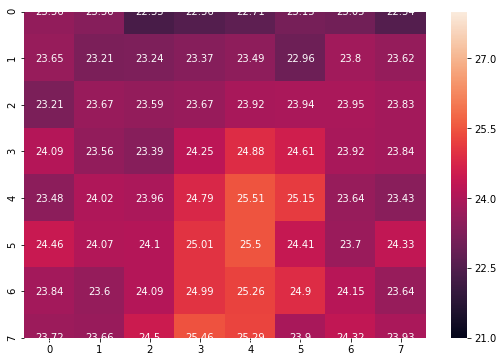

In [8]:
pixelStats(process="mean")

We can see that there's a lot of heat going on in the centre, especially down the bottom, with not much at all at the top.

Here's the data of the empty state:

Empty mean


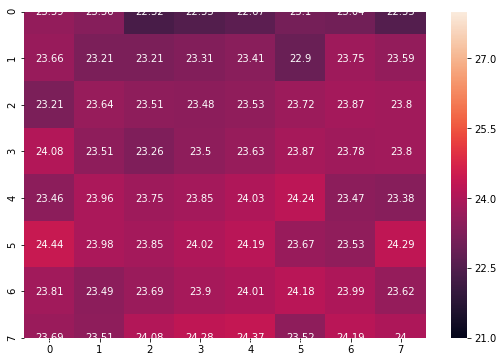

In [9]:
pixelStats("empty", "mean")

The data looks somewhat more homogenous, especially when taking into consideration the smaller heat range (approx 90-98).

Here's what the average heat of the standing & sitting positions look like:

Sitting mean


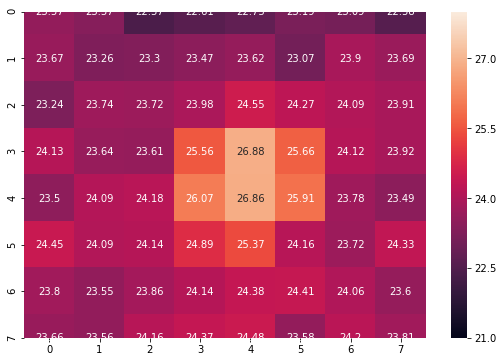

In [10]:
pixelStats("sitting", "mean")

Standing mean


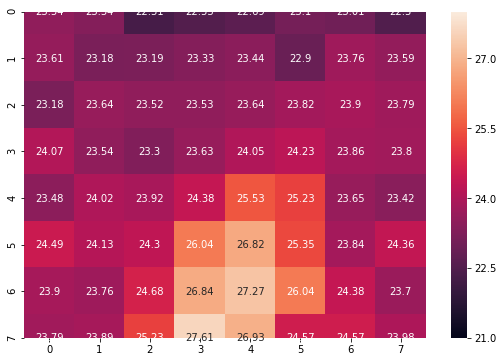

In [11]:
pixelStats("standing", "mean")

Both having much larger ranges, homogeneity is much less prevelant. Hopefully the distinction between the three states is enough for some easy classification!

Here's the standard deviation of each pixel regardless of state:

Std


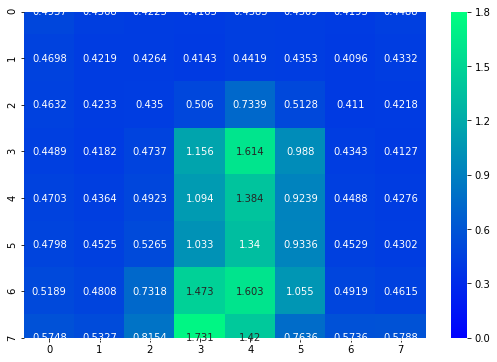

In [12]:
pixelStats(process="std")

With no one in it:

Empty std


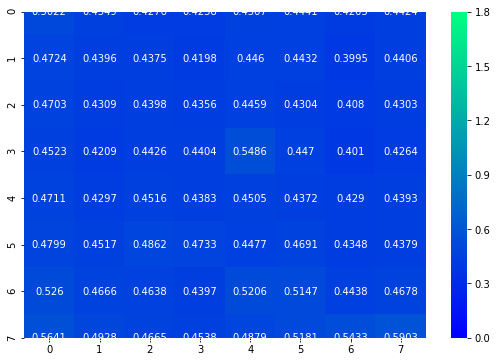

In [13]:
pixelStats("empty", "std")

While people are sitting down:

Sitting std


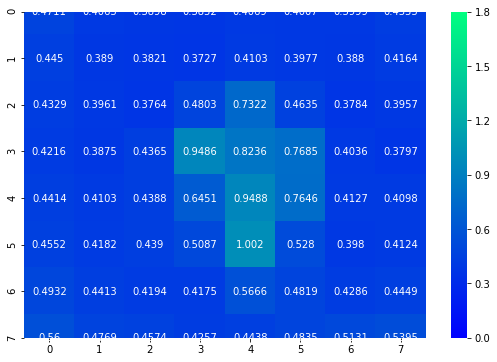

In [14]:
pixelStats("sitting", "std")

And while people are standing up:

Standing std


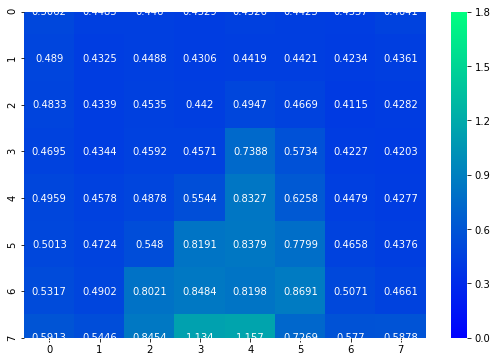

In [15]:
pixelStats("standing", "std")

The higher standard deviations overall seem to correlate with their high temperature counterparts, especially in the standard deviation map regardless of state. The low levels of standard deviation overall are promising for good data classification!

# Your Work:

We hope this helps you dive into the data and do your own investigations into how it could be classified. Have fun!

Dataframes:

 - cubicleData_allInfo
 
 - cubicleData_essentialInfo_structured
 
 - cubicleData_essentialInfo_flat

Goal classifications:

 - Empty
 
 - Standing
 
 - Sitting

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [17]:
cubicleData_essentialInfo_flat.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
5158,empty,22.75,22.50,21.75,22.25,22.75,23.25,23.00,22.25,24.00,...,24.00,23.75,22.75,23.50,24.00,24.50,24.50,23.75,24.50,24.25
649,empty,23.25,23.50,22.25,22.75,22.25,22.75,23.25,22.50,23.25,...,24.25,23.25,23.75,23.25,23.50,24.00,24.50,23.50,23.50,23.50
629,standing,23.75,23.75,22.75,23.00,23.00,23.50,23.75,22.25,24.00,...,24.50,23.50,24.00,24.50,25.50,28.25,27.00,24.00,24.25,24.00
2667,standing,24.00,23.75,22.75,22.75,23.00,23.00,23.50,22.75,24.00,...,24.75,24.25,23.75,24.25,25.00,27.50,28.25,25.25,25.00,24.25
4559,sitting,23.75,23.75,22.50,23.00,23.00,23.50,23.75,22.75,24.00,...,24.50,24.00,23.75,23.50,24.75,24.25,25.00,24.00,25.00,24.00
2178,sitting,23.25,23.00,22.25,22.75,22.50,23.25,22.25,22.75,23.50,...,24.00,23.50,23.25,23.00,23.75,24.75,24.25,23.75,24.00,24.25
1685,sitting,23.25,23.00,21.75,21.75,22.50,23.25,22.75,22.50,23.50,...,24.25,23.00,23.75,23.00,24.25,24.00,24.75,22.75,23.75,24.00
4646,sitting,23.25,23.75,22.25,22.25,22.50,23.50,23.00,21.75,24.00,...,23.00,23.50,23.25,23.75,25.25,24.25,24.00,23.50,24.75,23.50
2089,standing,24.50,23.50,22.50,23.00,23.25,24.00,23.50,22.75,23.25,...,25.00,24.50,24.75,25.50,27.25,29.75,28.75,25.25,25.00,24.00
4223,standing,22.50,22.50,22.00,22.25,22.00,22.50,22.00,22.00,23.25,...,23.75,23.75,22.50,23.00,24.50,27.75,27.25,25.25,24.75,24.25


In [18]:
#Aiden code
X_train, X_test, y_train, y_test = train_test_split(
    np.array(
        cubicleData_essentialInfo_flat.loc[
            :, cubicleData_essentialInfo_flat.columns != 0
        ]
    ),
    np.array(cubicleData_essentialInfo_flat[0]),
    test_size=0.3,
)
(X_train, X_test, y_train, y_test)

(array([[24.  , 23.5 , 22.5 , ..., 23.75, 24.25, 23.5 ],
        [24.25, 23.75, 23.75, ..., 25.  , 25.  , 24.  ],
        [23.  , 23.  , 22.5 , ..., 23.75, 24.25, 24.  ],
        ...,
        [22.5 , 22.  , 22.  , ..., 23.  , 23.75, 23.75],
        [23.5 , 23.  , 22.5 , ..., 24.5 , 25.  , 24.75],
        [23.25, 23.25, 21.75, ..., 22.75, 23.75, 23.75]]),
 array([[24.5 , 23.75, 22.5 , ..., 23.25, 25.  , 24.  ],
        [23.  , 23.25, 21.5 , ..., 24.75, 23.75, 23.5 ],
        [24.  , 23.25, 22.5 , ..., 24.75, 25.  , 24.5 ],
        ...,
        [23.75, 23.25, 22.25, ..., 23.5 , 24.25, 23.5 ],
        [22.75, 23.  , 22.  , ..., 23.75, 23.25, 23.  ],
        [23.25, 22.75, 22.  , ..., 22.5 , 23.  , 23.5 ]]),
 array(['sitting', 'standing', 'sitting', ..., 'empty', 'standing',
        'empty'], dtype=object),
 array(['empty', 'standing', 'standing', ..., 'sitting', 'sitting',
        'sitting'], dtype=object))

In [19]:
# Getting the data:
pixels = np.array(cubicleData_essentialInfo_flat.loc[:, cubicleData_essentialInfo_flat.columns != 0])
states = np.array(cubicleData_essentialInfo_flat[0])

pixelsTrain, pixelsTest, statesTrain, statesTest = train_test_split(pixels, states, test_size=0.3)

classifier = MLPClassifier(activation="relu", solver="adam", verbose=False)
classifier.fit(pixelsTrain, statesTrain)



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
#Using CPickle to export the classifier object
import pickle
with open("neuralNetwork_Baptiste.pkl", 'wb') as myFile:
    pickle.dump(classifier, myFile, protocol=1)


In [21]:
failCount = 0
statesFound = classifier.predict(pixelsTest)
for index in range(len(statesFound)):
    #print(predictionPair)
    if statesFound[index] != statesTest[index]:
        failCount += 1
        print("\nSerial Fehlur:")
        print([index, [statesFound[index], statesTest[index]]])

print("Percentage of successes: " + str(100 - 100*failCount/len(pixelsTest)))


Serial Fehlur:
[1559, ['empty', 'sitting']]
Percentage of successes: 99.94040524433849


In [24]:
bin_y_pred = [int(x != 'empty') for x in y_pred]
bin_y_test = [int(x != 'empty') for x in y_test]

In [27]:
y_pred = classifier.predict(X_test)
aucs = []
for neg_state in ['empty', 'standing', 'sitting']:
    bin_y_pred = [int(x != neg_state) for x in y_pred]
    bin_y_test = [int(x != neg_state) for x in y_test]
    aucs.append(metrics.roc_auc_score(bin_y_pred, bin_y_test))
aucs    

[1.0, 1.0, 1.0]

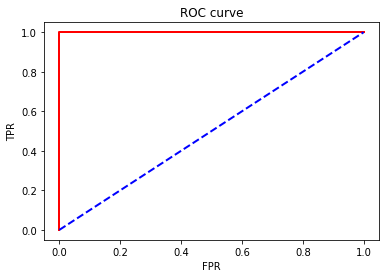

In [26]:
import matplotlib.pyplot as plt
from sklearn import metrics

##Computing false and true positive rates
fpr, tpr, _= metrics.roc_curve(bin_y_pred, bin_y_test, drop_intermediate=False)

plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()